## BMEB W4020: Circuits in the Brain 2022 Fall Homework #2

Author: [Shashwat Shukla](shashwat.shukla@columbia.edu), [Bruce Yi Bu](yb2520@columbia.edu)

Based on Previous Work by: Tingkai Liu, Mehmet Kerem Turkcan, Chung-Heng Yeh, Konstantinos Psychas, Teng Yang, Cong Han

Copyright 2022 Shashwat Shukla, Tingkai Liu, Bruce Yi Bu, and Aurel A. Lazar

### Names and UNIs
(Please include the names and UNIs of all team members here; **double click** on **markdown** blocks to edit)
Larence Xu, lzx2002
Guanzhou Fu, gf2510

## Problem 1: PRC of Hodgkin-Huxley Model
In this problem, you are asked to do the following:

1. Implement Winfree's method for approximating the Phase Response Curve (PRC) for Voltage of the Hodgkin-Huxley Model, which is called the `HodgkinHuxley` model in the `compneuro` package. Use simple words to describe the procedures and your method (via #comments). 
2. Generate spike train with HH neuron and the I/O equivalent project-integrate-and-fire (PIF) neuron when the input is [$I_{ext}(t)$](#note-on-I-ext). Use simple words to describe your implementation of PIF (via #comments). 
3. Evaluate the mean $\mu$ and standard deviation $\sigma$ of the difference between the corresponding spike times of the HH neuron and the equivalent PIF neuron for bandlimited stimulus described by [equation](#input) scaled to have maximum amplitude $c > 0$ (i.e. $\max_{t}|u(t)| = c$). Plot these statistics as a function of $c$ across values of $c$. 
    - **Note 1**: You should generate new inputs $u(t)$ (with different random coefficients) to ensure that the error statistics are not biased by the form of the input stimulus. 
    - **Note 2**: The value of $c$ should not be so large that the limit cycle of the HH model collapses to singularity. It would be instructive to look at F-I curve of the HH model first to find a range of input current values that gives periodic spiking (this was explored in the last homework).

#### Note on $I_{ext} = I + u(t)$ <a name="note-on-I-ext"></a>
Starting this homework, the injected current $I_{ext}$ will have the form $I+u(t)$, where $I$ refers to _injected current_ and $u(t)$ is the _stimulus_. In particular:


1. $I$: injected (bias) current is a _constant_ value for all time that is injected to the neuron model. You can consider this value as the _average_/DC value of the input $I_{ext}$. Since this value is not time-varying, it contains _no information_ (in the sense of entropy). For this reason, we don't refer to $I$ as _stimulus_. However, the bias $I$ will change the shape of the limit cycle $\Gamma$ (or the periodic solution ${\bf x}^0$) of the neuron model, where the higher the bias current $I$, the smaller the limit cycle and the faster the neuron oscillates. For this reason, we can consider the dynamic of the neuron model to be _parametrized_ / _indexed_ by the bias $I$.

2. $u(t)$: this is a time-varying signal that has information content. If we consider $I$ as the DC value of $I_{ext}$, then $u(t)$ will be a zero-mean signal that corresponds to local perturbation of the neuron dynamic around the limit cycle $\Gamma$. This is the input signal that we seeks to decode from the neuron spike times.

### Input Stimulus $u(t)$ - Complex Exponential <a name="input"></a>
The input stimulus here is a zero-DC valued complex exponential of order $M=5$ on support $t\in[0, 200]$ ms with bandwidth $\Omega = 2\pi \cdot 20 \quad [rad\cdot s^-1]$,
$$
u(t)= \sum^{M}_{m=-M}a_{m} \exp\left(j\frac{m\Omega t}{M}\right)
$$

Note that for stimulus $u(t)$ to be real-valued signal, the coefficients $a_m$ need to be conjugate-symmetric. In another word, $a_m = \overline{a_{-m}} = Re(a_{-m}) - j Im(a_{-m})$, 
where $Re(\cdot), Im(\cdot)$ are the _real_ and _imaginary_ parts of the complex number respectively. The stimulus $u(t)$ should be zero-DC valued, which means that $a_0 = 0$. This input stimulus $u(t)$ is additively coupled to a periodically spiking HH neuron.

## Problem 2: Synaptic Input and PRC

In the previous problem we explored how perturbations (in particular, the stimulus $u(t)$) can change the spike times of a periodically firing neuron. 
In this problem we explore how presynaptic voltage spikes are chemically transduced by synapses into transient neurotransmitter concentrations, and how this impacts postsynaptic spike times and relates to PRC. 

For this problem, we treat the synaptic current $I_{syn}$ as a perturbation to the total current $I_{ext} = I + I_{syn}$, where $I$ is the injected current.

1. Simulate a postsynaptic `HodgkinHuxley` neuron with $I=20$ pA (while omitting $I_{syn}$), plot the periodic spike train ($V_{post}$) along with the corresponding stable limit cycle. Note the timing of the spikes.
2. We assume that the neurotransmitter release $[NT]$ at a synapse, due to the presynaptic neuron firing at time $t_k$, can be approximated as a dirac delta spike $[NT]_{max} \cdot \mathbf{1}_{t_k}$; where $[NT]_{max}$ = 250 and is the maximum Neurotransmitter concentration.  
Referencing the PRC you obtained from Problem 1, generate and plot neurotransmitter concentration $[NT]$ for (clearly label your plots):  
   1. $t_k = \mathrm{argmax}(PRC)$ (time corresponding to the maximal phase response) 
   2. $t_k = \mathrm{argmin}(PRC)$ (time corresponding to the minimal phase response) 


   
3. Considering the synaptic current as $u(t)$ to the postsynaptic neuron, simulate an AMPA synapse with the above $[NT]$ inputs, along with the postsynaptic neuron voltage $V_{post}$. Recall that $I_{syn}(t)= g_{syn}(t) \cdot (V_{post}(t)-E_{rev})$.  
Plot the following as functions of time:
    1. Synaptic Conductance
    2. Synaptic Current 
    3. Postsynaptic Neuron Voltage


4. Overlay the resulting postsynaptic neuron voltage $V_{post}$ and limit cycle on the plots from Problem *2.1* to show the phase shift due to the injection of synpatic current. Clearly label the traces with an appropriate legend.
5. Repeat steps 3 and 4 with a GABA_A synapse. 
6. Comment on how the different synapses and the timing of presynaptic input affect the behaviour of the postsynaptic neuron. 

**For your own exploration (not graded)**:
Repeat steps 2 to 4 (only AMPA) with the following $[NT]=[NT]_{max} \cdot \mathbf{1}_{t_k}$ where $t_k = [\space \mathrm{argmax}(PRC),\space \mathrm{argmin}(PRC) \space]$.
Is is the behaviour of the postsynaptic neuron as expected (in terms of phase)? Explain your observations and comment on how you would expect the postsynaptic voltage to evolve with an increasing number of presynaptic spikes?


**Note**: By convention, synaptic current $I_{syn}$ has negative value because it denotes _inward_ current to the neuron. Therefore, to use simulation kernels (including `hodgkin_huxley`), the input current $I_{ext}$ will be $I_{ext} = -I_{syn}$. 

**Note**: Use the AMPA, GABA_A synapse models as defined in the `compneuro` package.  



# Before you start...
### The code skeleton 
* we provide a skeleton of the code for HW2, you will find helper functions as well as headers of functions that need to be completed (look for "**TO DO**" comments and markdowns)
* note that you are not required to follow this sequence; the skeleton is just provided for convenience but we highly recommend using it, and you are feel to modify or add custom functions

### Miscellaneous (attention)
* please remember to include your name in the corresponding field at the start of this notebook, otherwize an automatic 0 grade will be received for any missing member
* please clearly present your solutions and answers with proper use of plots, markdown and comments
* please start the assignment as soon as possible, submission deadlines are strictly followed and late submissions after we posted the solution (ususlaly on the same day as the deadline) will receive automatic 0
* please email both TAs at least 48hrs ahead of deadline if you cannot submit an assignment on time (due to exam schedules or  overwhelming deadlines, etc), we are flexible as long as we are informed
* please post your questions on Ed Discussions, and attend the office hours (every Thursday evening); **more on Ed**:
    * while discussing on Ed, please make good use of the reply and comment features inside threads to avoid cluttering with multiple threads regarding the same question from the same user
    * please refrain from asking questions or posting threads that would explicitly share the right answer with everyone
    * only post code snipets when you have narrowed down the issue to that particular section and only share ploted results only when you have good reason to suspect their correctness
    * once you finish debugging your code by the end of a thread, please avoid languages such as "is this correct now?" since we aren't really allowed to explicitly say yes when they are; be confident in your hardwork.

## Setup

In [15]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from compneuro.neurons.hodgkin_huxley import HodgkinHuxley
from compneuro.utils.signal import spike_detect

np.random.seed(0)  # fix random seed
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.dpi"] = 80

In [16]:
import bokeh as bk
import bokeh.layouts
import bokeh.models
import bokeh.plotting
from bokeh.io import output_notebook
from bokeh.palettes import all_palettes as palette
output_notebook()  # render Bokeh animations inline

Loading BokehJS ...

In [3]:
from compneuro.neurons.hodgkin_huxley_rinzel import HodgkinHuxleyRinzel


# Problem 1 - PRC of RHH model

## Initialization

In [330]:
# TODO: Implement signal generator that takes in [time, coefficients, order, Bandwidth] as input
def bandlmt_sig(t,a,M,omega):
    u = np.zeros_like(t)
    
    for k in range(len(t)):
        
        a = np.zeros(2 * (M+1), dtype=complex)
        a[M+1] = 1j

        for m in range(-M, (M+1)):
            u[k] += np.sum(a[m] * np.exp(1j * (m *omega * t[k] / M)))
                                 
    return u

In [137]:
# TODO: Specify the time resolution for computing PRC. 
# The smaller the value the better the Winfree method performs

# NOTE: start with a smaller value to ensure the code works before making it larger
dt = 1e-5 #best value of dt that allows the code to work fast 

In [138]:
# TODO: Specify the bias of HH Model (I in I_ext = I + u(t)).
# This value will be used in both the neuron model itself and its PIF.

bias = 15 
# unit is in pico amp

# we suggest refering the injection current amplitude (aka without stimulus) 
# that you've experimented with in HW1 that gives robust firing 

## Item (i): Extract the PRC

In [332]:
# TODO: Implement Winfree's Method
# As a suggestion, the function should return 
# 1. period: the period of oscillation, maybe in number of time-steps
# 2. limitCycle: the output of the state variables [V, n, m, h, a, b] on a limit cycle
# 3. PRC: the phase response curve of the Voltage along the limit cycle

def winfree(model, I, dt, t, amp): #winfree(hh, I, dt, t)
    res = model.solve(t, I_ext = I, verbose=False) 
    v1 = res_test['V'][0]
    n1 = res_test['n'][0]
    m1 = res_test['m'][0]
    h1 = res_test['h'][0]
    
    signals_db ={}
    ref_ind = spike_detect(V1)
    ref_ind = np.where(ref_ind)[0]
    
    #the section above finds the Voltage spike train of the unperturbed signal. The output is a tuple, 
    #and then extracted to individual variables. Then use the spike_detect function to find the spikes of the voltage
    #spike train, and find the position of them in the voltage array. 
    p_range = np.linspace(ref_ind[3], ref_ind[4], 50)
    
    #this part creates a list of numbers between the 4th and 5th spike on the spike train, specifically 50 equally 
    #spaced numbers. 
    
    for i, pid in enumerate(p_range):
        hh.states["V"] = V1[round(pid)] + amp[0]
        hh.states["n"] = n1[round(pid)] + amp[1] #1e-3
        hh.states["m"] = m1[round(pid)] + amp[2]#1e-3
        hh.states["h"] = h1[round(pid)] + amp[3]#1e-3
    
        res = model.solve(t[round(pid) :], I_ext=I_ext[round(pid) :], reset_initial_state=False, verbose=False)
    
        res_arr.append(res_test)
        signals_db[f"xp{i}"] = [1e3 * t[round(pid) :]]
        signals_db[f"vp{i}"] = [res["V"][0]]
        signals_db[f"np{i}"] = [res["n"][0]]
        signals_db[f"mp{i}"] = [res["m"][0]]
        signals_db[f"hp{i}"] = [res["h"][0]]
        
    #The for-loop above applys a voltage perturbation to the positions starting from the 4th spike and there after. 
        
    vp = signals_db["vp0"][0]
    hol = len(v_p)
    PRC = v_p - v1[: hol]
    PRC = PRC/np.max(np.abs(PRC))

    #this section findst he PRC using the T-T' formula. 
    
    av=0
    for i in range(4, len(ref_ind)):
        av += ref_ind[i] - ref_ind[i-1]
    
    
    p = av/len(range(4, len(ref_ind)))
    
    #Finds the period between two spikes. 
    licy = res
    licy_p = signals_db
    return p, licy, licy_p, PRC 

#licy: Limit Cycle
#PRC
#P: Period


winfree function calls in the HH model, the HH.solve function needs I, dt as input. 

In [333]:
# TODO: Simulate your model
model = hh
dt = 1e-5
t = np.arange(0, 0.2, dt)
I = bias*np.ones_like(t)
amp=[.1, 1e-3, 1e-3, 1e-3]

period, limit, limitP, PRC = winfree(model, I, dt, t, amp)

In [ ]:
# TODO: Visualize the limit cycle and the PRC along it

Text(0, 0.5, 'Normalized Phase Shift')

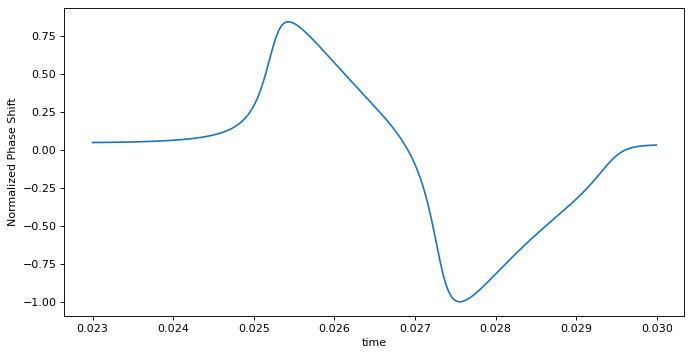

In [334]:
plt.plot(t[2300: 3000], PRC[2300:3000])
plt.xlabel("time")
plt.ylabel("Normalized Phase Shift")

<function matplotlib.pyplot.show(close=None, block=None)>

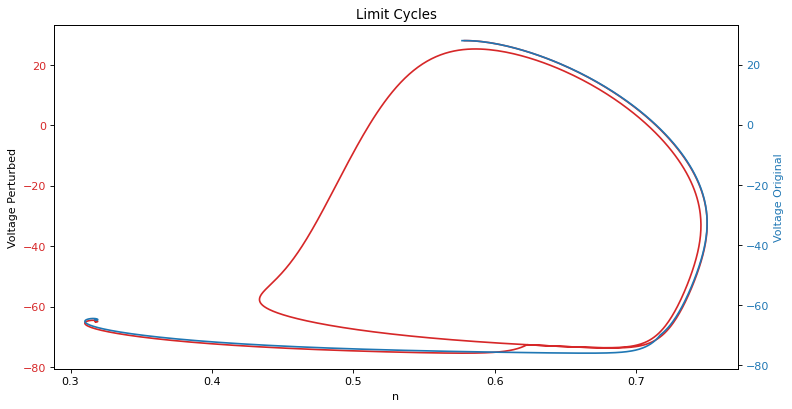

In [335]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('n')
ax1.set_ylabel('Voltage Perturbed')
ax1.plot(limitP["np0"][0], limitP["vp0"][0], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Voltage Original', color=color)
ax2.plot(limit["n"][0], limit["V"][0], color=color)
ax2.tick_params(axis='y', labelcolor = color)

fig.tight_layout()

plt.title("Limit Cycles")
plt.show

## Item (ii): Compare Spikes of PIF and RHH

We first generate a bandlimited signal with random coefficients

In [328]:
# temporal support of the signal [0, 200] ms
t = np.arange(0, 200, dt) # you can use [0,0.2]s  as well if it suits you

# bandwidth: 20Hz
omega = 2*np.pi*20

# order: 5
M = 5

# Amplitude of the signal, you can use other values.
Sig_Amp = 1

# TODO: generate coefficients
am = np.nan

# generate input signal. Make sure that the signal's DC value (mean) is 0
#u1 = bandlmt_sig(t, am, M, Omega)
#u1 = Sig_Amp*u1/max(u1)

In [331]:
bandlmt_sig(t,1,M,omega)

/var/folders/9y/z941zj9s703bmhw4wc13x05r0000gn/T/ipykernel_66725/770888659.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  u[k] += np.sum(a[m] * np.exp(1j * (m *omega * t[k] / M)))


array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# TODO: simulate model and find spikes

hh = HodgkinHuxley()
acc = hh.solve(np.nan)

v2 = acc["V"][0]

acc_ind = spike_detect(v2)

In [ ]:
# TODO: find spike time indices of RHH

tk_idx_HH = np.where(acc_ind)[0]

### Output of PIF
The t-transform of the PIF neuron can be written as,
$$
\int_{t_k}^{t_{k+1}}(1+\psi(s+\tau(s))u(s))ds = \delta_{t_{k+1}}-\delta_{t_{k}} \approx T, \\
\tau(t) = \psi(t+\tau(t))u(t),~\tau(0)=0.
$$    
We assume that $\tau(s)=0$ , and hence the $t$-transform is reduced to
$$ 
\int_{t_k}^{t_{k+1}}(1+\psi(s)u(s))ds = T.
$$  

In [ ]:
# TODO: Implement the PIF model using the input defined above and the PRC curve computed

# def pif(np.nan):
#     return V




In [ ]:
# TODO: execute the pif and find spike times

v3 = pif()
t_pif = spike_detect(v3)
t_pif = np.where(t_pif)[0]

In [1]:
# TODO: Plot HH, PIF outputs and compare the Inter-spike intervals (time_diff)

## Item (iii): Record PIF Error Statistics

In [ ]:
# TODO: Initalize experiment
# Find a range of amplitude $C$ that is within the range of permissable input current to the RHH model.
# Too large and the limit cycle could collapse
C = np.nan # amplitude of u(t) <-- Edit this into an array of c vals

avg_diff = np.zeros(len(C))
var_diff = np.zeros(len(C))

In [ ]:
# TODO: Simulate the RHH and PIF for inputs I_ext = I + u(t) for different amplitude of u(t): max|u(t)| = c
# TODO: Compute the difference between interspike interval of the HH and PIF, 
# and calculate the mean/standard deviation of the error.
# TODO: visualize the error across stimulus amplitude.

# Problem 2: Synaptic Input and PRC

### Step 1. Simulate neuron with bias current

In [283]:
# TODO: Simulate the PostSynaptic Neuron with a bias current of 20pA
 #use 
dt = 1e-5
t = np.arange(0, 0.2, dt)
NT_max =1
E_1_2 = 2
gamma = 5
t0 = 5e-3
T = 5 * 1e-2

I_ext = np.zeros(len(t))
I_ext[(t >= t0) * (t <= (t0 + T))] = 20

res2 = hh.solve(t, I_ext=I_ext, verbose=False)
v21 = res2["V"][0]

In [226]:
def NT1_f(Vpre):
    return NT_max / (1 + np.exp(-(Vpre - E_1_2) / gamma))

NT1 = NT1_f(v21)

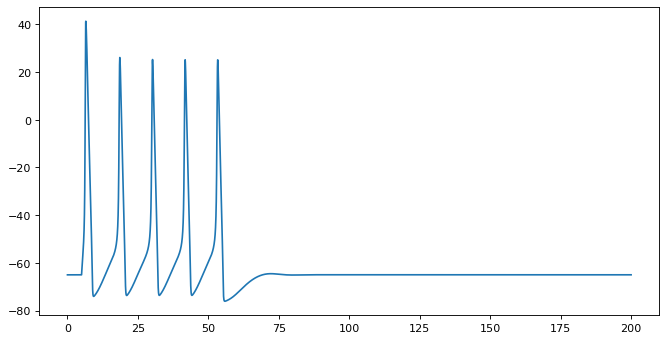

In [284]:
plt.plot(t*1e3, v21)

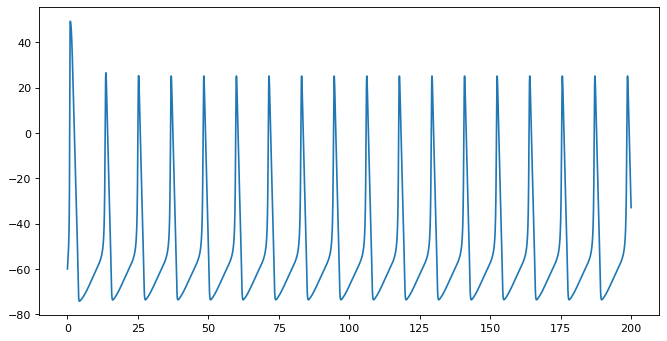

In [225]:
# TODO: plot the spike train V_post and the stable limit cycle
plt.plot(t * 1e3, v21)

### Step 2. Generate the neuro transmitter traces

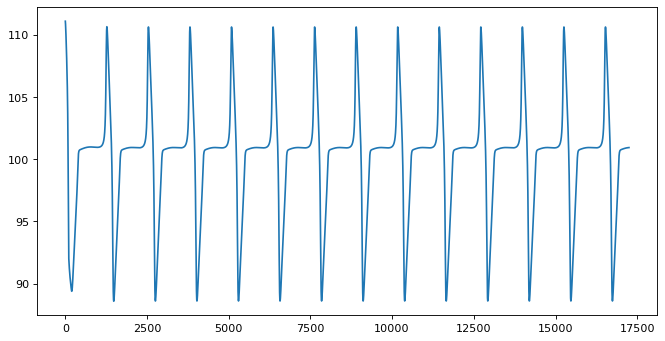

In [229]:
# TODO extract the time/index of maximum and minimum PRC
NT_max = 250

tk = NT1_f(PRC)

plt.plot(tk)

In [ ]:
# TODO plot the NT for both conditions

### Step 3.  Simulate and plot the synaptic current for AMPA synapse

In [253]:
# TODO: Use the Synaptic current as $u(t)$ to the postsynaptic Neuron
# TODO: link the synapse to HH neuron, simulate over t using Euler's method

from compneuro.synapses.ampa import AMPA

# c  = np.nan
# NT = c * spike_state

# syn = AMPA() 
# syn_res = syn.solve(...) #use "Euler" solver

In [286]:
dt = 1e-5
t = np.arange(0, 0.2, dt)
t0 = 5e-3  # starting time of [NT] onset
T = 5 * 1e-2  # 5 ms [NT] duration
NT_max = 1
E_1_2 = 2

I_ext = np.zeros(len(t))
I_ext[(t >= t0) * (t <= (t0 + T))] = 20
hhn = HodgkinHuxley()
res = hhn.solve(t=t, I_ext=I_ext, verbose=False)
Vpre = res["V"][0]
NT = np.zeros(len(t))
NT[Vpre > E_1_2] = NT_max
syn = AMPA()
res = syn.solve(t=t, I_ext=NT, verbose=False, solver="Euler")
s = res["s"][0]
g = syn.conductance(s=s)

hhn = HodgkinHuxley(V=-65.01, n=0.3178, m=0.0530, h=0.5958)
I = np.zeros_like(t)
Vpost = np.zeros_like(t)
Vpost[0] = hhn.states["V"]
for i in range(len(t) - 1):
    I[i + 1] = -g[i + 1] * (Vpost[i] - syn.params["E"])
    hhn.state_arr += (
        dt * hhn.Time_Scale * np.vstack(hhn.ode(t=i, states=hhn.state_arr, I_ext=I[i + 1]))
    )
    Vpost[i + 1] = hhn.states["V"]

<function matplotlib.pyplot.show(close=None, block=None)>

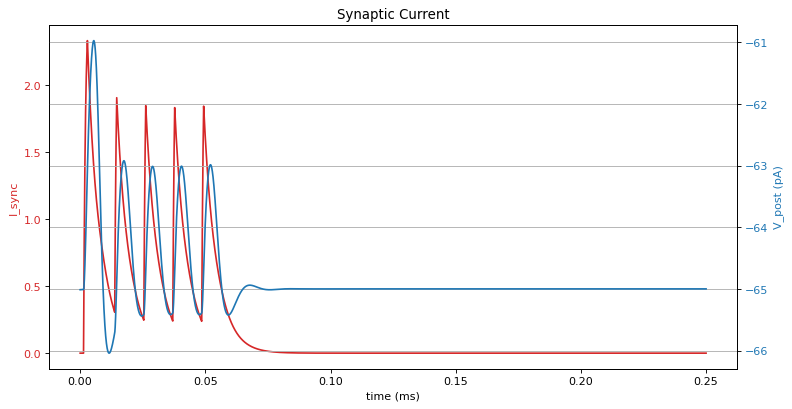

In [269]:
# TODO: Plot the synaptic conductance, synaptic current and postsynaptic voltage for each NT
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (ms)')
ax1.set_ylabel('I_sync', color=color)
ax1.plot(t, I, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('V_post (pA)', color=color)
ax2.plot(t, Vpost, color=color)
ax2.tick_params(axis='y', labelcolor = color)

fig.tight_layout()
plt.grid(axis='y')
plt.title("Synaptic Current")
plt.show

Text(0.5, 1.0, 'Synaptic Conductance')

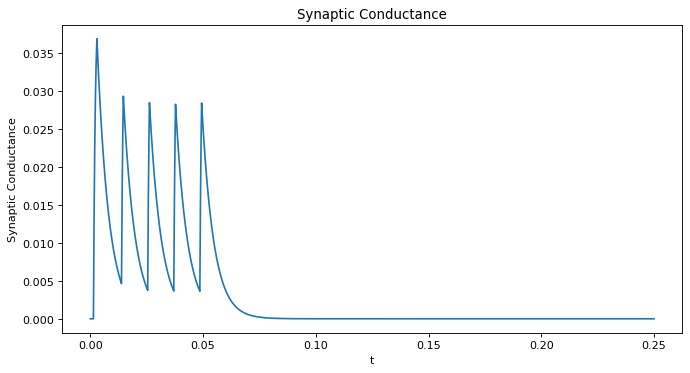

In [278]:
plt.plot(t, g)
plt.xlabel("t")
plt.ylabel("Synaptic Conductance")
plt.title("Synaptic Conductance")

Text(0.5, 1.0, 'Synaptic Current')

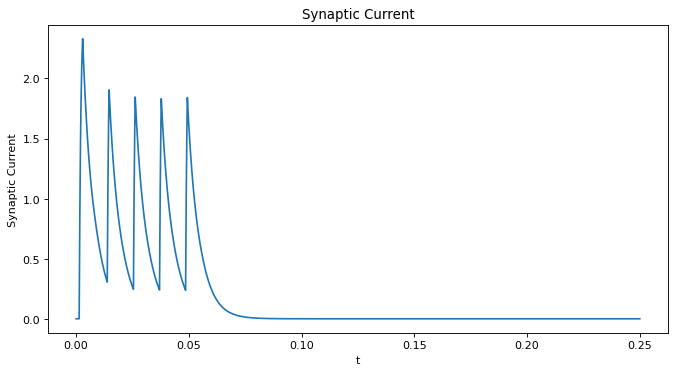

In [279]:
plt.plot(t, I)
plt.xlabel("t")
plt.ylabel("Synaptic Current")
plt.title("Synaptic Current")

Text(0.5, 1.0, 'Post-Synaptic Neuron Voltage')

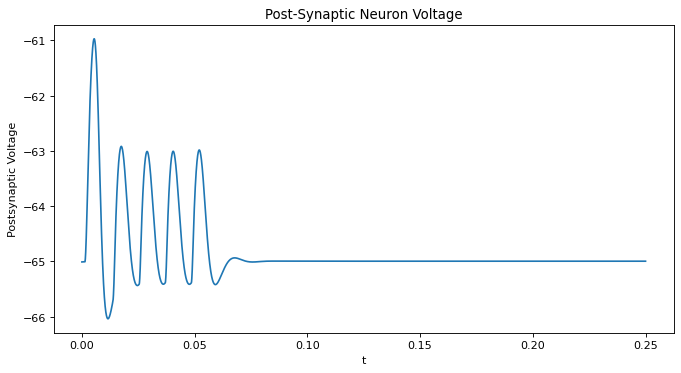

In [281]:
plt.plot(t, Vpost)
plt.xlabel("t")
plt.ylabel("Postsynaptic Voltage")
plt.title("Post-Synaptic Neuron Voltage")

### Step 4. Limit cycle with synaptic injection

<function matplotlib.pyplot.show(close=None, block=None)>

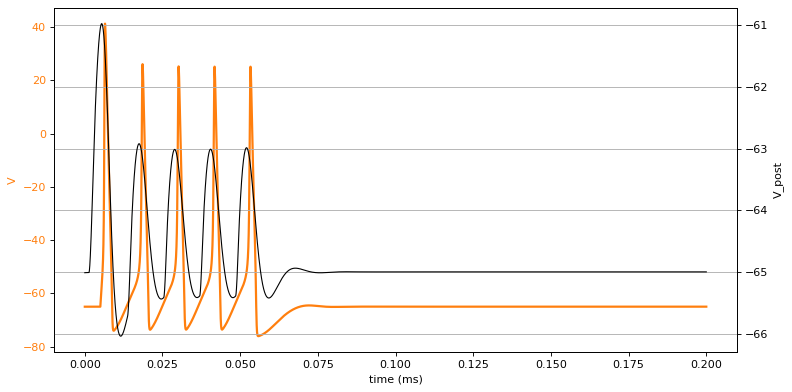

In [289]:
# TODO: Plot
# overlay the resulting spike_train and limit cycle on the plots from **1.**

fig, ax1 = plt.subplots(1)
color = 'tab:orange'
ax1.set_xlabel('time (ms)')
ax1.set_ylabel('V', color=color)
ax1.plot(t, v21, color=color, linewidth = 2)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'k'
ax2.set_ylabel('V_post', color=color)
ax2.plot(t, Vpost, color=color, linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.grid(axis='y')
plt.show




### Step 5: Simulate and plot the synapctic current for GABA_A synspase

In [291]:
from compneuro.synapses.gaba_a import GABA_A

# c  = np.nan
# NT = c * spike_state



# syn = GABA_A() 
# syn_res = syn.solve(...) #use "Euler" solver
syn = GABA_A()
res5 = syn.solve(t=t, I_ext=NT, verbose=False, solver="Euler")
s5 = res5["s"][0]
g5 = syn.conductance(s=s)

hhn = HodgkinHuxley(V=-65.01, n=0.3178, m=0.0530, h=0.5958)
I5 = np.zeros_like(t)
Vpost5 = np.zeros_like(t)
Vpost5[0] = hhn.states["V"]
for i in range(len(t) - 1):
    I5[i + 1] = -g5[i + 1] * (Vpost5[i] - syn.params["E"])
    hhn.state_arr += (
        dt * hhn.Time_Scale * np.vstack(hhn.ode(t=i, states=hhn.state_arr, I_ext=I[i + 1]))
    )
    Vpost5[i + 1] = hhn.states["V"]

<function matplotlib.pyplot.show(close=None, block=None)>

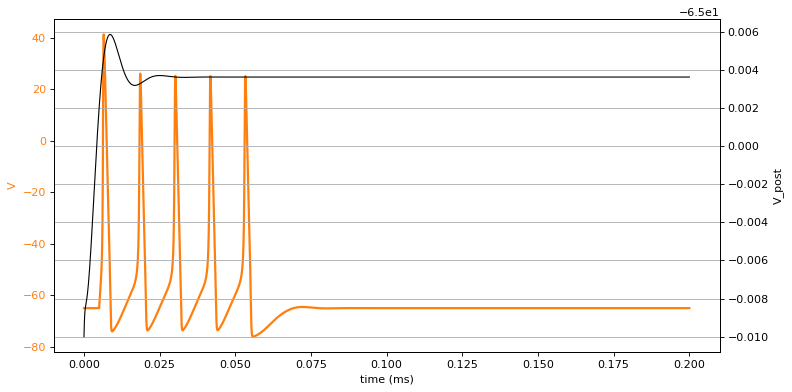

In [292]:
fig, ax1 = plt.subplots(1)
color = 'tab:orange'
ax1.set_xlabel('time (ms)')
ax1.set_ylabel('V', color=color)
ax1.plot(t, v21, color=color, linewidth = 2)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'k'
ax2.set_ylabel('V_post', color=color)
ax2.plot(t, Vpost5, color=color, linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.grid(axis='y')
plt.show